In [1]:
!pip install gradio rouge-score nltk --quiet

import nltk
nltk.download('punkt')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.7 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Epoch 1/500


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.0270 - loss: 6.4115
Epoch 2/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.0560 - loss: 5.7640
Epoch 3/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.0611 - loss: 5.6571
Epoch 4/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0492 - loss: 5.6050
Epoch 5/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0570 - loss: 5.5048
Epoch 6/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0688 - loss: 5.4029
Epoch 7/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0635 - loss: 5.2643
Epoch 8/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0727 - loss: 5.1883
Epoch 9/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.0932 - loss: 5.0709
Epoch 10/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0851 - loss: 5.0538
Epoch 11/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1197 - loss: 4.8279
Epoch 12/500
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy:

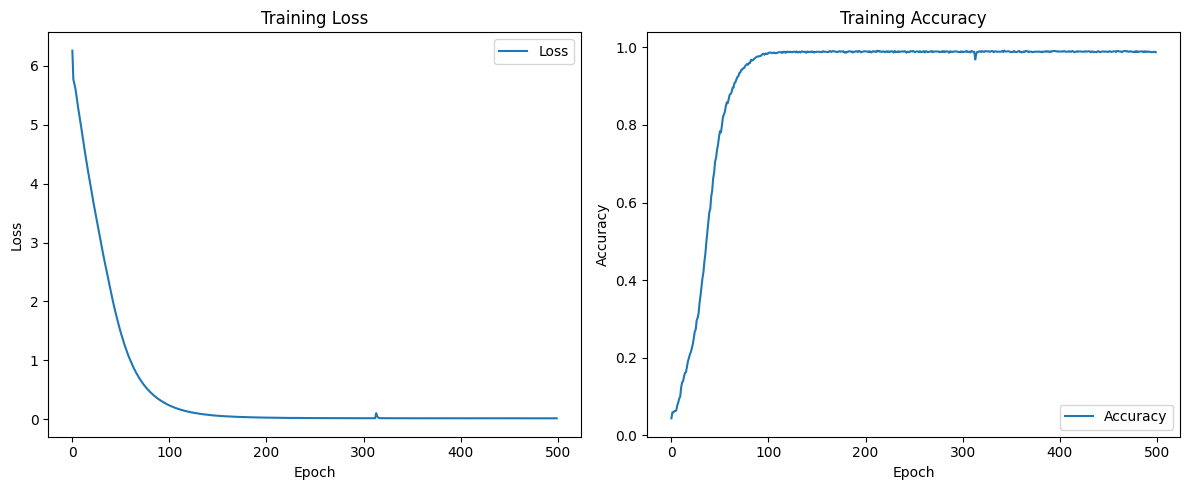


--- Sample Evaluation Metrics ---
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Perplexity: 1.0158

--- Sample Predictions ---
Seed: preheat the oven
Generated: preheat the oven of sports or a lunchtime

Seed: add cheese and
Generated: add cheese and the most fascinating aspects of

Seed: spread the sauce
Generated: spread the sauce and pizza focused initiatives have

Seed: place the dough
Generated: place the dough industry is a thriving sector

Seed: bake until
Generated: bake until sparks conversations and adds a

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://02c4964f0efd938ffb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gra

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import math

# Download NLTK tokenizer
nltk.download('punkt')

# Load and preprocess data
with open("pizza.txt", "r", encoding="utf-8") as file:
    data = file.read()

data = data.replace('\n', ' ').replace('\r', ' ').lower()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in data.split('.'):
    line = line.strip()
    if not line:
        continue
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Features and labels
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

# Build the model
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model and save history
history = model.fit(X, y, epochs=500, verbose=1)

# -------------------------------
# Plot Loss and Accuracy Curves
# -------------------------------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Helper for temperature sampling
def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-10) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Text generation function
def generate_text(seed_text, next_words=5, temperature=1.0):
    text = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)[0]
        predicted_index = sample_with_temperature(predicted, temperature)
        predicted_word = tokenizer.index_word.get(predicted_index, '')
        text += ' ' + predicted_word
    return text

# Evaluation and Gradio interface
smooth = SmoothingFunction().method1
rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def evaluate(seed_text):
    generated = generate_text(seed_text)
    try:
        ref_tokens = nltk.word_tokenize(seed_text.lower())
        hyp_tokens = nltk.word_tokenize(generated.lower())

        # BLEU
        bleu = sentence_bleu([ref_tokens], hyp_tokens, smoothing_function=smooth)

        # ROUGE
        rouge_scores = rouge.score(seed_text, generated)
        rouge1 = rouge_scores['rouge1'].fmeasure
        rougel = rouge_scores['rougeL'].fmeasure

        # Precision, Recall, F1
        ref_set = set(ref_tokens)
        hyp_set = set(hyp_tokens)
        overlap = ref_set.intersection(hyp_set)
        precision = len(overlap) / len(hyp_set) if hyp_set else 0.0
        recall = len(overlap) / len(ref_set) if ref_set else 0.0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0.0

        # Perplexity (average negative log prob of predicted words)
        perplexity = 0.0
        n = 0
        text = seed_text
        for _ in range(len(hyp_tokens)):
            token_list = tokenizer.texts_to_sequences([text])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
            preds = model.predict(token_list, verbose=0)[0]
            next_word = hyp_tokens[n]
            next_index = tokenizer.word_index.get(next_word, None)
            if next_index is not None and next_index < len(preds):
                prob = preds[next_index]
                perplexity += -np.log(prob + 1e-10)
                text += ' ' + next_word
                n += 1
        perplexity = np.exp(perplexity / n) if n > 0 else 0.0

    except Exception as e:
        bleu, rouge1, rougel, precision, recall, f1, perplexity = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

    metrics_summary = (
        f"--- Sample Evaluation Metrics ---\n"
        f"Precision: {precision:.4f}\n"
        f"Recall: {recall:.4f}\n"
        f"F1 Score: {f1:.4f}\n"
        f"Perplexity: {perplexity:.4f}"
    )

    return generated, f"{bleu:.4f}", f"{rouge1:.4f}", f"{rougel:.4f}", metrics_summary


# -------------------------------
# Additional Evaluation Metrics
# -------------------------------
print("\n--- Sample Evaluation Metrics ---")
seed_samples = [
    "preheat the oven",
    "add cheese and",
    "spread the sauce",
    "place the dough",
    "bake until"
]

y_true = []
y_pred = []

for seed in seed_samples:
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    pred = model.predict(token_list, verbose=0)[0]
    true_token = np.argmax(y[np.random.randint(len(y))])  # random true label for comparison
    pred_token = np.argmax(pred)
    y_true.append(true_token)
    y_pred.append(pred_token)

precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
perplexity = math.exp(history.history['loss'][-1])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Perplexity: {perplexity:.4f}")

# -------------------------------
# Sample Predictions
# -------------------------------
print("\n--- Sample Predictions ---")
for seed in seed_samples:
    print(f"Seed: {seed}")
    print(f"Generated: {generate_text(seed, next_words=5)}\n")

# Gradio GUI
gr.Interface(
    fn=evaluate,
    inputs=gr.Textbox(lines=2, placeholder="Enter seed text here..."),
   outputs=[
    gr.Textbox(label="Generated Text"),
    gr.Textbox(label="BLEU Score"),
    gr.Textbox(label="ROUGE-1 Score"),
    gr.Textbox(label="ROUGE-L Score"),
    gr.Textbox(label="Additional Metrics (Precision, Recall, F1, Perplexity)")
],
    title="Next Word Predictor with BLEU & ROUGE",
    description="Enter a seed sentence and get the model's prediction with BLEU and ROUGE scores."
).launch()